In [1]:
import torch
import cv2
import numpy
import ffmpeg
from tqdm.notebook import tqdm
from glob import glob
import IPython.display as ipd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline


In [2]:
import os
os.listdir()

['requirements.txt',
 'explore.ipynb',
 'venv',
 '2021-10-13 04:32:22.416976.h264',
 '2021-10-13 04:32:22.416976.mp4']

In [8]:
filename = '2021-10-13 04:32:22.416976.h264'
#given the fact that openCV can't seem to read the video; we'll use ffmpeg to convert it to a format that it can read
subprocess.run(['ffmpeg',
                '-i',
                filename,
                "-qscale",
                "0",
                '2021-10-13 04:32:22.416976.mp4'])  

ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --e

CompletedProcess(args=['ffmpeg', '-i', '2021-10-13 04:32:22.416976.h264', '-qscale', '0', '2021-10-13 04:32:22.416976.mp4'], returncode=0)

In [3]:
#display the file
filename = "2021-10-13 04:32:22.416976.mp4"
ipd.Video(filename, width= 600)

In [5]:
cap = cv2.VideoCapture(filename)

In [6]:
#some information about the video
print(f"Frame width: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
print(f"Frame height: {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")
print(f"Frame rate: {cap.get(cv2.CAP_PROP_FPS)}")
print(f"Total frames: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}")

Frame width: 1440.0
Frame height: 1080.0
Frame rate: 25.0
Total frames: 3595.0


ret: True 
 frame:[[ 75   0 137]
 [ 74   0 136]
 [ 73   0 134]
 ...
 [118   4 183]
 [118   4 183]
 [118   4 183]] 
 frame shape = (1080, 1440, 3)


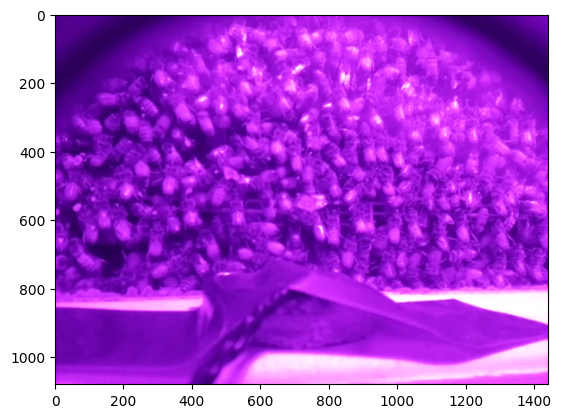

In [12]:
#get the first frame of the video
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print(f"ret: {ret} \n frame:{frame[1]} \n frame shape = {frame.shape}")
plt.imshow(frame)

In [18]:
#display multiple images
n_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"Number of frames: {n_frames}")
cap.release()

Number of frames: 3595.0


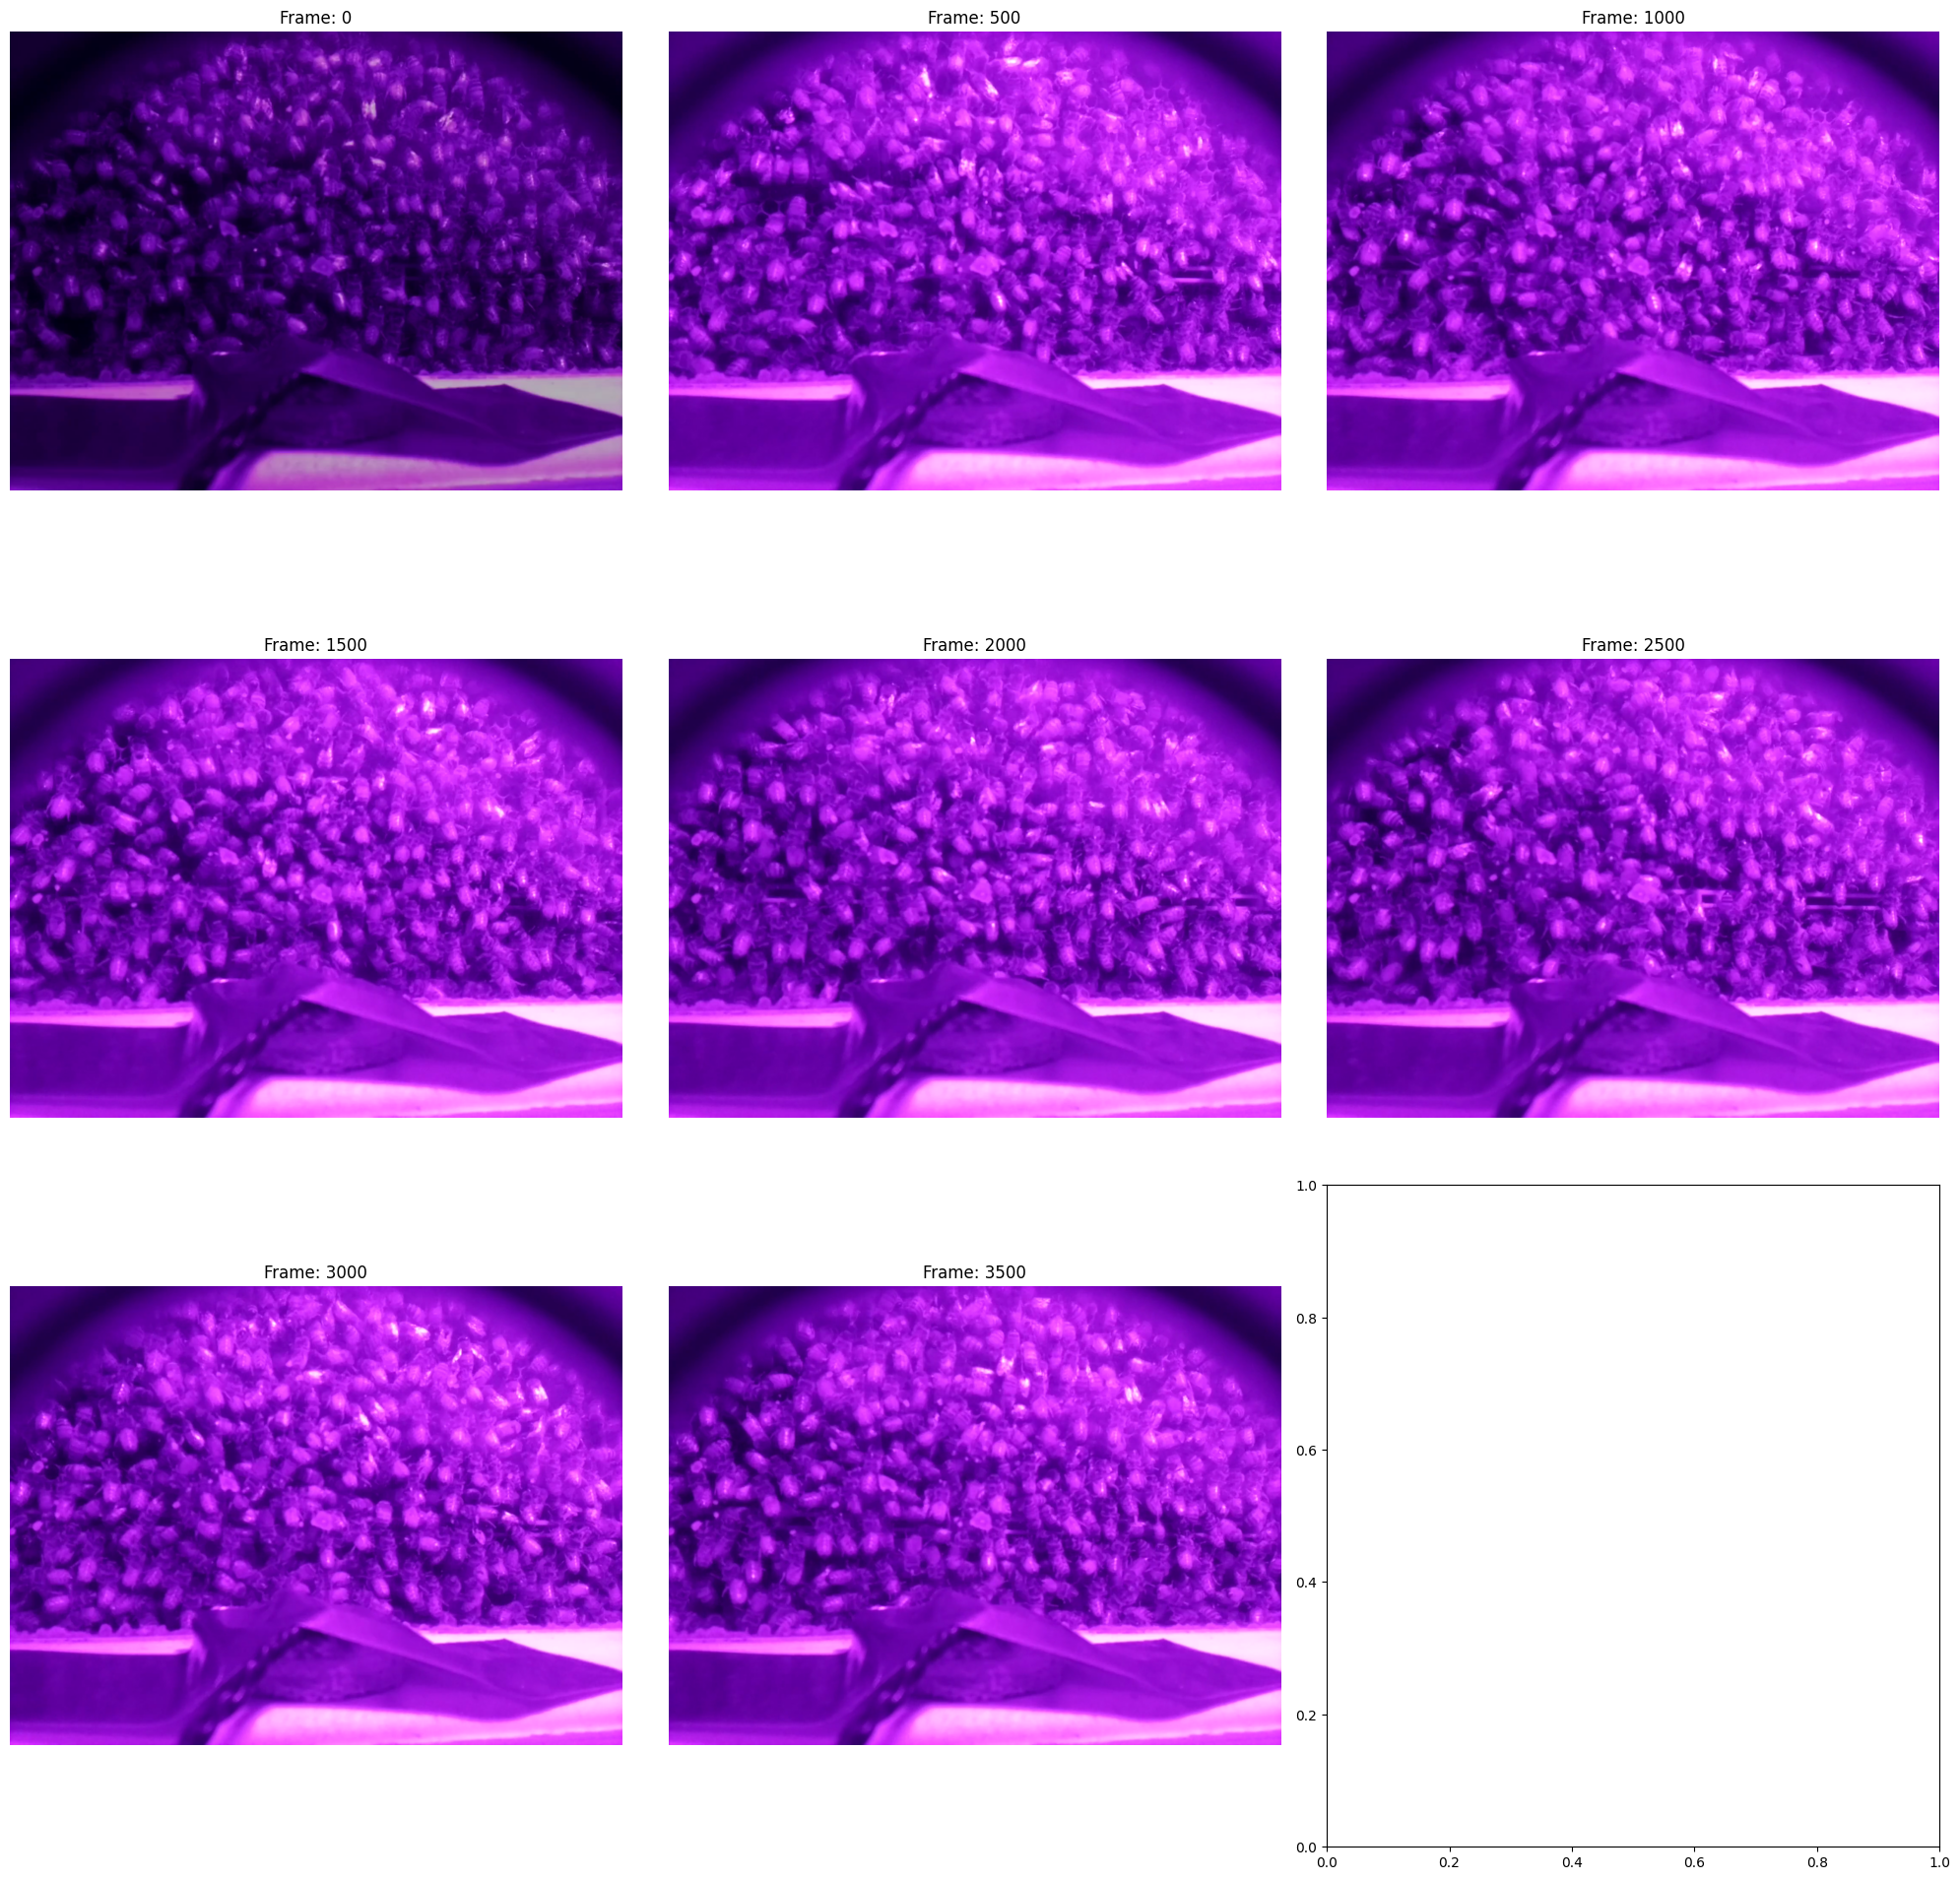

In [34]:
#every 500 frames, display frame
fig, axs = plt.subplots(3,3, figsize=(20,20))
axs = axs.flatten()

img_inx = 0
cap = cv2.VideoCapture(filename)
for frame_num in range(int(n_frames)):
    ret, frame = cap.read()
    if not ret:
        break
    if frame_num % 500 == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        axs[img_inx].imshow(frame)
        axs[img_inx].set_title(f"Frame: {frame_num}")
        axs[img_inx].axis("off")   
        img_inx += 1
        
plt.tight_layout()
plt.show()
cap.release()